In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define dataset paths
train_dir = "C:\\Users\\snayi\\Desktop\\My Data Science\\GitHubMaal\\Fruit quality\\dataset\\train"
test_dir = "C:\\Users\\snayi\\Desktop\\My Data Science\\GitHubMaal\\Fruit quality\\dataset\\test"

# Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,      # Normalize pixel values (0-1 range)
    rotation_range=20,      # Rotate images randomly by 20 degrees
    width_shift_range=0.2,  # Shift width randomly
    height_shift_range=0.2, # Shift height randomly
    shear_range=0.2,        # Apply shearing
    zoom_range=0.2,         # Randomly zoom in/out
    horizontal_flip=True    # Randomly flip images horizontally
)

# Only normalize for testing data
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Load training dataset
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),  # Resize all images to 150x150
    batch_size=32,          # Use batches of 32 images
    class_mode='binary'     # Binary classification: fresh (1) or rotten (0)
)

# Load testing dataset
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 10901 images belonging to 6 classes.
Found 2698 images belonging to 6 classes.


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerators for training and testing
train_datagen = ImageDataGenerator(rescale=1.0/255)  # Normalize pixel values
test_datagen = ImageDataGenerator(rescale=1.0/255)

# Flow data from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),  # Resize images to 150x150
    batch_size=32,
    class_mode='categorical'  # Use 'categorical' for multi-class classification
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 10901 images belonging to 6 classes.
Found 2698 images belonging to 6 classes.


In [4]:
print(train_generator.class_indices)  # Should display a dictionary of class labels
print(train_generator.samples)       # Number of images found in the training directory

{'freshapples': 0, 'freshbanana': 1, 'freshoranges': 2, 'rottenapples': 3, 'rottenbanana': 4, 'rottenoranges': 5}
10901


In [5]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(6, activation='softmax')  # 6 neurons for 6 classes
])

In [6]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [7]:
train_generator = train_datagen.flow_from_directory(train_dir,target_size=(150, 150),batch_size=32,class_mode='categorical')
test_generator = test_datagen.flow_from_directory(test_dir,target_size=(150, 150),batch_size=32,class_mode='categorical')

Found 10901 images belonging to 6 classes.
Found 2698 images belonging to 6 classes.


In [8]:
history = model.fit(train_generator,steps_per_epoch=train_generator.samples // train_generator.batch_size,validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size,
    epochs=10
)

Epoch 1/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 122s 353ms/step - accuracy: 0.6214 - loss: 1.2311 - val_accuracy: 0.8992 - val_loss: 0.2841
Epoch 2/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 0s 192us/step - accuracy: 0.9688 - loss: 0.1634 - val_accuracy: 1.0000 - val_loss: 0.1303
Epoch 3/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 123s 358ms/step - accuracy: 0.9027 - loss: 0.2803 - val_accuracy: 0.8746 - val_loss: 0.3435
Epoch 4/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 0s 101us/step - accuracy: 0.8438 - loss: 0.3368 - val_accuracy: 0.8000 - val_loss: 0.6780
Epoch 5/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 123s 359ms/step - accuracy: 0.9392 - loss: 0.1697 - val_accuracy: 0.9174 - val_loss: 0.2265
Epoch 6/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 0s 132us/step - accuracy: 0.9375 - loss: 0.0997 - val_accuracy: 1.0000 - val_loss: 0.0703
Epoch 7/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 123s 357ms/step - accuracy: 0.9634 - loss: 0.1060 - val_accuracy: 0.9215 - val_loss: 0.2133
Epoch 8/10
340/340 ━━━━━━━━━━━━━━━━━━━━ 0s 112us/step - accuracy: 0.9688 - loss: 0

In [9]:
import numpy as np
import cv2
from tkinter import Tk
from tkinter.filedialog import askopenfilename

# Save the entire model to a file
model.save("fruit_quality_model.h5")

# Load the saved model
model = tf.keras.models.load_model("fruit_quality_model.h5")

In [10]:
image_path = "C:\\Users\\snayi\\Desktop\\My Data Science\\GitHubMaal\\Fruit quality\\dataset\\test\\rottenbanana\\rotated_by_15_Screen Shot 2018-06-12 at 8.51.46 PM.png"
# Call the function

def preprocess_image(image_path):
    img = cv2.imread(image_path)                     # Read image
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)       # Convert to RGB
    img = cv2.resize(img, (150, 150))                # Resize to 150x150
    img = img / 255.0                                # Normalize pixel values
    img = np.expand_dims(img, axis=0)                # Add batch dimension
    return img
    
preprocessed_image = preprocess_image(image_path)
print(preprocessed_image.shape)  # Check the shape of the preprocessed image

(1, 150, 150, 3)


In [11]:
model = tf.keras.models.load_model("fruit_quality_model.h5")

In [12]:
from tensorflow.keras.utils import load_img, img_to_array

In [13]:
pil = load_img("C:\\Users\\snayi\\Desktop\\My Data Science\\GitHubMaal\\Fruit quality\\dataset\\test\\rottenbanana\\rotated_by_15_Screen Shot 2018-06-12 at 8.51.46 PM.png", target_size=(150,150))

image = img_to_array(pil)
image.shape
image = image/255
# Add a new dimension at axis=0
image = np.expand_dims(image, axis=0)
image.shape
(model.predict(image) > 0.5).astype('int')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


array([[0, 0, 0, 0, 1, 0]])

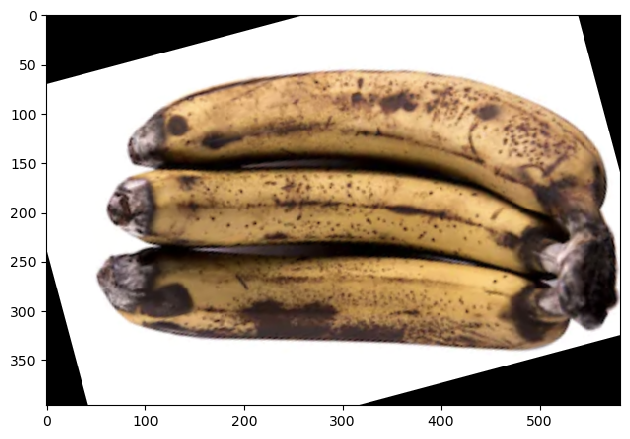

In [14]:
from skimage.io import imshow
imshow("C:\\Users\\snayi\\Desktop\\My Data Science\\GitHubMaal\\Fruit quality\\dataset\\test\\rottenbanana\\rotated_by_15_Screen Shot 2018-06-12 at 8.51.46 PM.png")

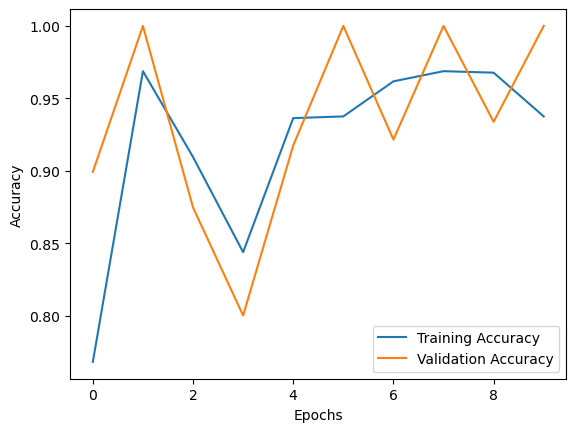

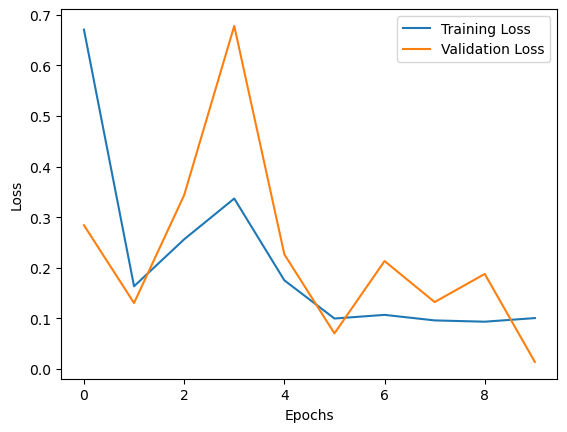

In [15]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
